In [31]:
#Reading in the data
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import mplleaflet

#install xlrd


In [32]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\abrah\\Desktop\\OSE-Scientific-Computing-Project'

In [33]:
files = os.listdir("data")
prefix='Crime'
file= list(filter(lambda file: file.startswith(prefix),files))

df = []
for f in file:
    csv_file="data"+ "/" + f
    print(csv_file)
    df.append(pd.read_csv(csv_file))
df_full = pd.concat(df, ignore_index=True)


data/CrimeData-2015.csv
data/CrimeData-2016.csv
data/CrimeData-2017.csv
data/CrimeData-2018.csv
data/CrimeData-2019.csv
data/CrimeData-2020.csv
data/CrimeData-2021.csv


In [36]:
df_full.head()
data=df_full

In [25]:
## Initial Data Cleaning 

In [37]:
#Cleaning the Dates
data['OccurDate'] = pd.to_datetime(data['OccurDate'],format='%d/%m/%Y')
data['OccurDay'] = pd.DatetimeIndex(data['OccurDate']).day
data['OccurYear'] = pd.DatetimeIndex(data['OccurDate']).year
data['OccurMonth'] = pd.DatetimeIndex(data['OccurDate']).month
data['OccurMonth_Year']  = pd.to_datetime(data['OccurDate']).dt.to_period('M')
#data['OccurDate']=pd.to_datetime(data['OccurDate'])
#data['OccurMonth'] =data['OccurDate'].dt.strftime('%Y-%m')

#date in year month day format
data= data[(data.OccurMonth_Year<"2021-06") & (data.OccurMonth_Year>"2015-06") ]


In [38]:
data.head()

,Address,CaseNumber,CrimeAgainst,Neighborhood,OccurDate,OccurTime,OffenseCategory,OffenseType,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,ReportDate,OffenseCount,OccurDay,OccurYear,OccurMonth,OccurMonth_Year
912,NaN,15-X4331944,Person,Brentwood-Darlington,2015-07-01,138,Assault Offenses,Simple Assault,NaN,NaN,NaN,NaN,01/07/2015,1,1,2015,7,2015-07
918,NaN,15-X4332622,Person,Lloyd,2015-07-01,1230,Assault Offenses,Aggravated Assault,NaN,NaN,NaN,NaN,01/07/2015,1,1,2015,7,2015-07
919,NaN,15-X4332748,Person,Humboldt,2015-07-01,1315,Assault Offenses,Intimidation,NaN,NaN,NaN,NaN,01/07/2015,1,1,2015,7,2015-07
920,NaN,15-X4332811,Person,Centennial,2015-07-01,1746,Assault Offenses,Simple Assault,NaN,NaN,NaN,NaN,01/07/2015,2,1,2015,7,2015-07
921,NaN,15-X4332836,Person,Hazelwood,2015-07-01,2134,Assault Offenses,Simple Assault,NaN,NaN,NaN,NaN,01/07/2015,1,1,2015,7,2015-07


In [8]:
#data.OffenseCategory.value_counts().iloc[:3].iloc[:3].index

Index(['Larceny Offenses', 'Assault Offenses', 'Vandalism'], dtype='object')

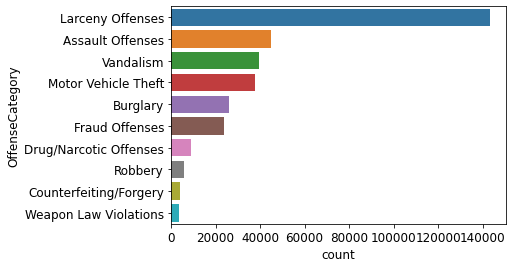

In [39]:
a = data['OffenseCategory'].unique()
ax = sns.countplot(y="OffenseCategory",data=data, order=data.OffenseCategory.value_counts().iloc[:10].index)

In [86]:
data_month_year = data.groupby('OccurDate_New').OffenseCount.sum().reset_index()
data_month_year.dropna(inplace = True)
#data_month_year['OccurDate_New'] = data_month_year['OccurDate_New'] .dt.to_timestamp()
data_month_year
data_month_year= data_month_year[data_month_year.OccurDate_New>"2015-06-01"]
data_month_year= data_month_year[data_month_year.OccurDate_New<"2021-06-01"]

KeyError: 'OccurDate_New'

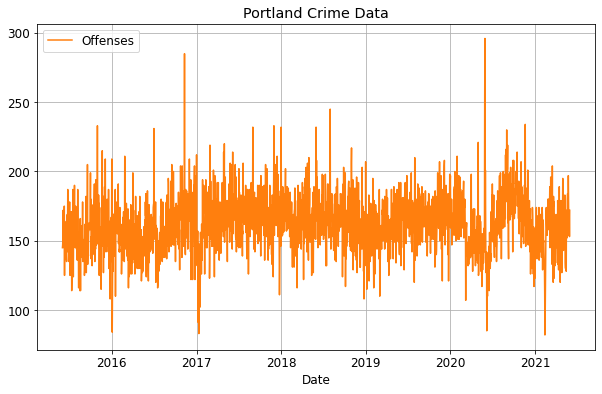

In [14]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(data_month_year.OccurDate_New, data_month_year.OffenseCount, color='tab:orange', label='Offenses')



ax.set_xlabel('Date')
ax.set_ylabel('')
ax.set_title('Portland Crime Data')
ax.grid(True)
ax.legend(loc='upper left');


In [23]:
data_month_year = data.groupby('OccurMonth_Year').OffenseCount.sum().reset_index()
data_month_year.dropna(inplace = True)
data_month_year['OccurMonth_Year'] = data_month_year['OccurMonth_Year'] .dt.to_timestamp()
data_month_year= data_month_year[data_month_year.OccurMonth_Year>"2015-06-01"]
data_month_year= data_month_year[data_month_year.OccurMonth_Year<"2021-06-01"]

In [24]:

data_month_year

,OccurMonth_Year,OffenseCount
166,2015-07-01,4316
167,2015-08-01,3967
168,2015-09-01,3908
169,2015-10-01,4476
170,2015-11-01,4005
...,...,...
232,2021-01-01,4740
233,2021-02-01,4043
234,2021-03-01,4671
235,2021-04-01,4404


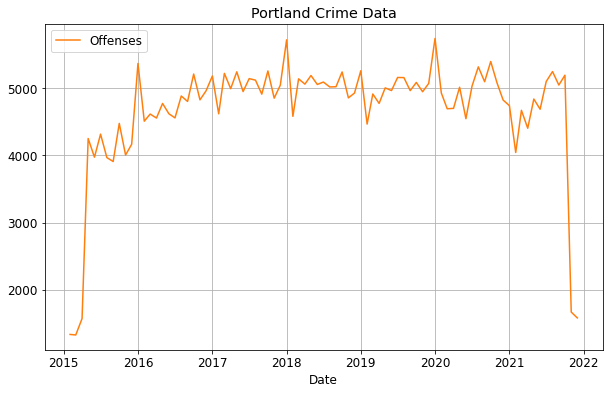

In [36]:

plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(data_month_year.OccurMonth_Year, data_month_year.OffenseCount, color='tab:orange', label='Offenses')


ax.set_xlabel('Date')
ax.set_ylabel('')
ax.set_title('Portland Crime Data')
ax.grid(True)
ax.legend(loc='upper left');

In [37]:
data_month_year = data.groupby(['OccurMonth_Year','OffenseCategory']).OffenseCount.sum().reset_index()

data_month_year 

,OccurMonth_Year,OffenseCategory,OffenseCount
0,1971-01,Sex Offenses,2
1,1972-07,Sex Offenses,1
2,1975-01,Sex Offenses,2
3,1977-01,Sex Offenses,3
4,1978-01,Sex Offenses,1
...,...,...,...
2082,2021-12,Robbery,34
2083,2021-12,Sex Offenses,12
2084,2021-12,Stolen Property Offenses,1
2085,2021-12,Vandalism,249


In [38]:
data_month_year= data_month_year[data_month_year.OccurMonth_Year>"2015-01-01"]
data_month_year

,OccurMonth_Year,OffenseCategory,OffenseCount
404,2015-02,Arson,3
405,2015-02,Assault Offenses,153
406,2015-02,Burglary,82
407,2015-02,Counterfeiting/Forgery,17
408,2015-02,Drug/Narcotic Offenses,38
...,...,...,...
2082,2021-12,Robbery,34
2083,2021-12,Sex Offenses,12
2084,2021-12,Stolen Property Offenses,1
2085,2021-12,Vandalism,249


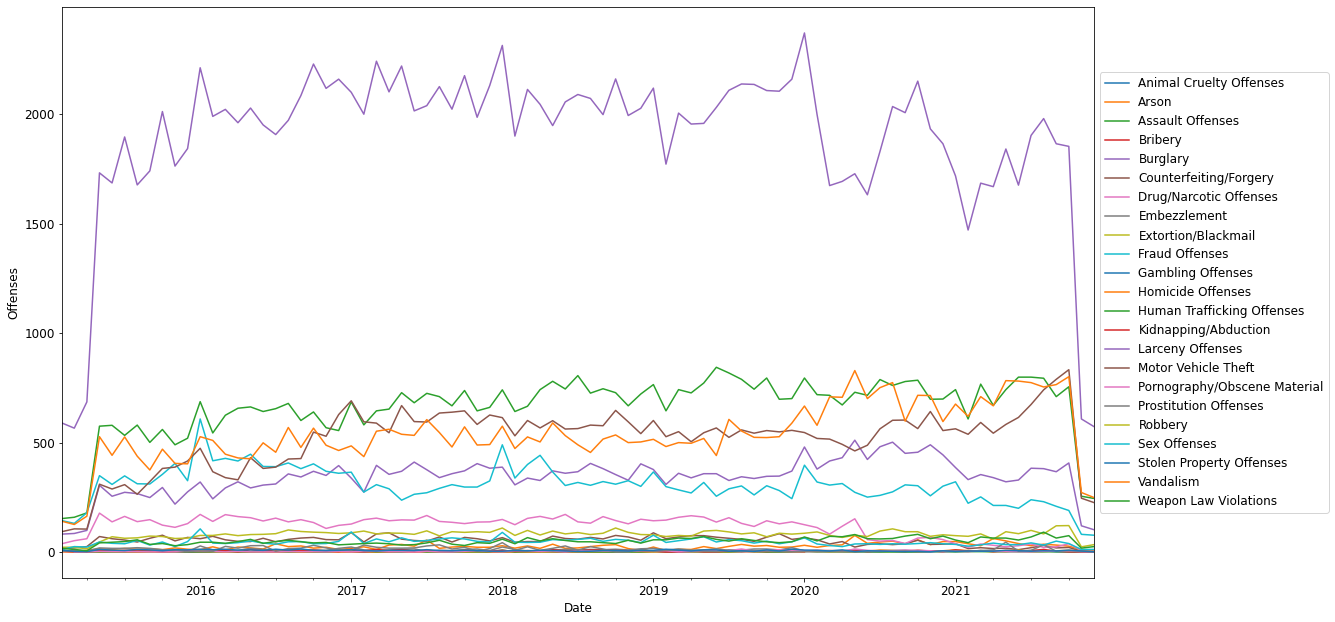

In [39]:

fig, ax = plt.subplots()

for label, grp in data_month_year.groupby('OffenseCategory'):
    grp.plot(x = "OccurMonth_Year", y = "OffenseCount",ax = ax, label = label,)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.set_size_inches(18.5, 10.5)
    ax.set_xlabel('Date')
    ax.set_ylabel('Offenses')

Any time series visualization may consist of the following components: Base Level + Trend + Seasonality + Error.


In [35]:


data_month_year = data.groupby('OccurDate_New').OffenseCount.sum().reset_index()
data_month_year.dropna(inplace = True)
data_month_year= data_month_year[data_month_year.OccurDate_New>"2015-01-01"]


data_month_year.sort_values('OccurDate_New',inplace = True)
data_month_year.set_index('OccurDate_New',inplace=True)
data_month_year.index=pd.to_datetime(data_month_year.index)


NameError: name 'data' is not defined

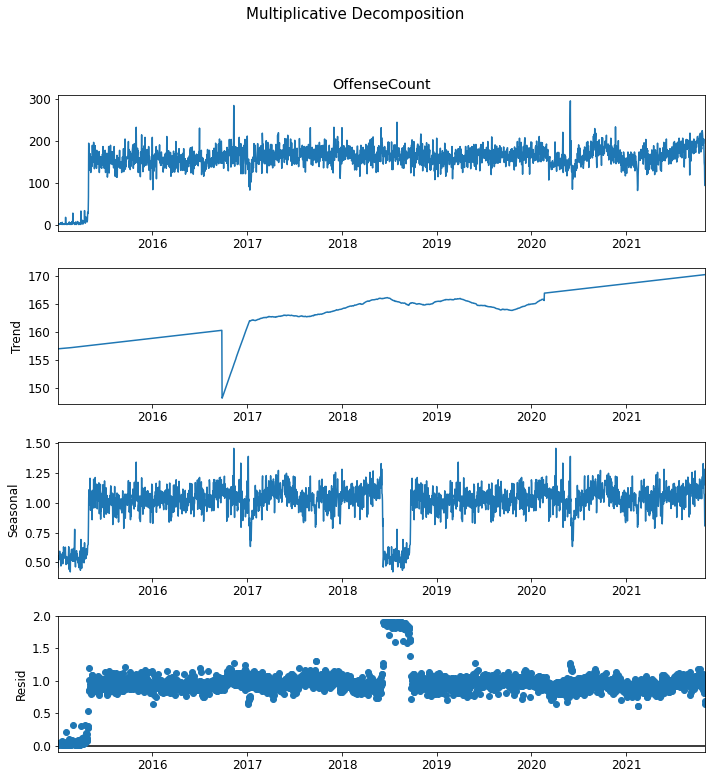

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse




# Multiplicative Decomposition 
result_mul = seasonal_decompose(data_month_year['OffenseCount'], model='multiplicative', extrapolate_trend='freq', period = int(len(data_month_year)/2))

# Additive Decomposition
#result_add = seasonal_decompose(data_month_year['OffenseCount'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decomposition ', fontsize=15, y=1.08)

plt.show()

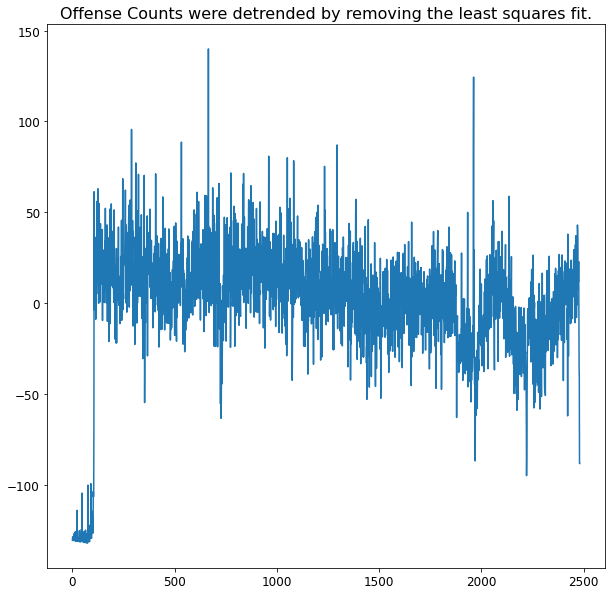

In [61]:
# Subtraction of the line of best fit with scipy

from scipy import signal

detrended = signal.detrend(data_month_year.OffenseCount.values) 
plt.plot(detrended)
plt.title('Offense Counts were detrended by removing the least squares fit.', fontsize=16)
plt.show()

,OBJECTID,NAME,COMMPLAN,SHARED,COALIT,HORZ_VERT,Shape_Leng,MAPLABEL,ID,geometry
9,10,ARBOR LODGE,ALBINA,N,NPNS,HORZ,9466.411504,Arbor Lodge,10,"POLYGON ((-13656518.251 5712854.259, -13656521..."


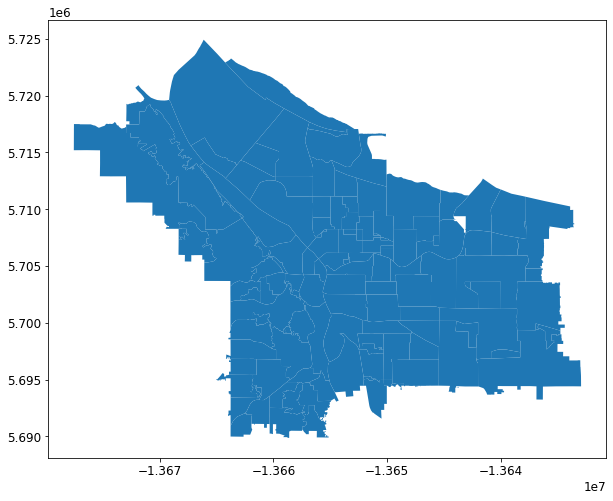

In [169]:

import geopandas as gpd
nbh_shape_df=gpd.read_file("data/portland_neighborhood_boundaries/Neighborhood_Boundaries.shp")
nbh_shape_df.plot()
nbh_shape_df[nbh_shape_df["NAME"]=="ARBOR LODGE"]

In [125]:
nbh_shape_df['NAME']= nbh_shape_df['NAME'].str.split().str[0]
nbh_shape_df['NAME']= nbh_shape_df['NAME'].str.replace(' ', '')
nbh_shape_df.sort_values(by=['NAME'])



,OBJECTID,NAME,COMMPLAN,SHARED,COALIT,HORZ_VERT,Shape_Leng,MAPLABEL,ID,geometry
21,22,ALAMEDA,None,N,NECN,HORZ,8520.792120,Alameda,22,"POLYGON ((-13652439.452 5709390.573, -13651185..."
35,36,ALAMEDA/BEAUMONT-WILSHIRE,None,Y,NECN,None,1387.295670,Alameda/Beaumont-Wilshire,36,"POLYGON ((-13651187.424 5707894.862, -13650948..."
31,32,ALAMEDA/IRVINGTON,ALBINA,Y,NECN,None,3103.729943,Alameda/Irvington Community Assn.,32,"POLYGON ((-13652690.478 5708247.373, -13652121..."
9,10,ARBOR,ALBINA,N,NPNS,HORZ,9466.411504,Arbor Lodge,10,"POLYGON ((-13656518.251 5712854.259, -13656521..."
109,110,ARDENWALD-JOHNSON,None,Y,SEUL,None,2635.870961,Ardenwald-Johnson Creek/Woodstock,110,"POLYGON ((-13649538.893 5694974.380, -13649535..."
111,112,ARDENWALD-JOHNSON,None,N,SEUL,HORZ,3672.769047,Ardenwald-Johnson Creek,112,"POLYGON ((-13649535.321 5694638.100, -13649405..."
106,107,ARDENWALD-JOHNSON,None,N,SEUL,HORZ,10699.932092,Ardenwald-Johnson Creek,107,"POLYGON ((-13651044.966 5695046.834, -13651044..."
14,15,ARGAY,None,N,EPCO,VERT,13252.062099,Argay Terrace,15,"POLYGON ((-13639991.801 5711741.299, -13639950..."
26,27,ARGAY/WILKES,None,Y,EPCO,None,1481.618791,Argay/Wilkes Community Group,27,"POLYGON ((-13637786.338 5708911.462, -13637783..."
57,58,ARLINGTON,None,N,NWNW,HORZ,6836.826216,Arlington Heights,58,"POLYGON ((-13659118.708 5704419.415, -13659111..."


In [ ]:
CULLY ASSOCIATION OF NEIGHBORS:CULLY
SUMNER ASSOCIATION OF NEIGHBORS:SUMNER
WILKES COMMUNITY GROUP:WILKES
SABIN COMMUNITY ASSOCIATION:SABIN
ARGAY/WILKES COMMUNITY GROUP:ARGAY
BOISE/ELIOT:BOISE
IRVINGTON COMMUNITY ASSOCIATION:IRVINGTON
ARGAY TERRACE:ARGAY
BRIDGETON:BRIDGETON
CENTENNIAL COMMUNITY ASSOCIATION:CENTENNIAL
CONCORDIA:CONCORDIA
CRESTON-KENILWORTH:CRESTON-KENILWORTH
CRESTWOOD:CRESTWOOD	
EAST COLUMBIA:EAST COLUMBIA
EASTMORELAND:EASTMORELAND
ELIOT:ELIOT



In [155]:
data_by_nbhd = data.groupby('Neighborhood').OffenseCount.sum().reset_index()
data_by_nbhd

,Neighborhood,OffenseCount
0,Alameda,1017
1,Arbor Lodge,3454
2,Ardenwald,278
3,Argay,4136
4,Arlington Heights,541
5,Arnold Creek,230
6,Ashcreek,714
7,Beaumont-Wilshire,1409
8,Boise,2829
9,Brentwood-Darlington,4767


In [170]:
pd.set_option('display.max_rows', 500)
data_by_nbhd = data.groupby('Neighborhood').OffenseCount.sum().reset_index()
data_by_nbhd['Neighborhood']=data_by_nbhd['Neighborhood'].str.upper()
data_by_nbhd=data_by_nbhd.rename(columns={'Neighborhood':'NAME'})
data_by_nbhd=data_by_nbhd.replace({'NAME': {'WOODLAND PARK': 'WOODLAND', 
                                            'WEST PORTLAND PARK': 'WEST',
                                            'ARDENWALD':'ARDENWALD-JOHNSON',
                                            'DOWNTOWN':'PORTLAND','ST':'ST.', 
                                            'MT TABOR':'MTTABOR',
                                            'MT SCOTT-ARLETA':'MTSCOTT-ARLETA',
                                            'Northwest Heights':'MTSCOTT-ARLETA',
                                            
                                           }})
#data_by_nbhd


data_by_nbhd['NAME']= data_by_nbhd['NAME'].str.split().str[0]
data_by_nbhd

,NAME,OffenseCount
0,ALAMEDA,1017
1,ARBOR,3454
2,ARDENWALD-JOHNSON,278
3,ARGAY,4136
4,ARLINGTON,541
5,ARNOLD,230
6,ASHCREEK,714
7,BEAUMONT-WILSHIRE,1409
8,BOISE,2829
9,BRENTWOOD-DARLINGTON,4767


In [171]:
nbh_shape_df_filter=nbh_shape_df.filter(items=['NAME', 'geometry'])

In [174]:
plz_df = pd.merge(
    left=data_by_nbhd[['NAME', 'OffenseCount']],
    right=nbh_shape_df_filter,
    on='NAME',
    how='left'
)

In [184]:
plz_df_only_complete=plz_df[plz_df['geometry']!=None]
plz_df_only_complete

,NAME,OffenseCount,geometry
0,ALAMEDA,1017,"POLYGON ((-13652439.452 5709390.573, -13651185..."
6,ASHCREEK,714,"POLYGON ((-13663051.814 5695424.882, -13662976..."
7,ASHCREEK,714,"POLYGON ((-13661343.375 5693386.752, -13661343..."
8,ASHCREEK,714,"POLYGON ((-13661736.544 5694304.901, -13661758..."
9,BEAUMONT-WILSHIRE,1409,"POLYGON ((-13650042.401 5709842.450, -13650042..."
10,BOISE,2829,"POLYGON ((-13654971.281 5709256.855, -13654970..."
11,BRENTWOOD-DARLINGTON,4767,"POLYGON ((-13645440.756 5696752.811, -13645438..."
12,BRIDGETON,881,"POLYGON ((-13654119.219 5716859.597, -13653544..."
13,BRIDLEMILE,673,"POLYGON ((-13660249.642 5700007.979, -13660270..."
20,CONCORDIA,3240,"POLYGON ((-13652661.010 5712753.903, -13652386..."


In [188]:
from geopandas import GeoDataFrame
merged = GeoDataFrame(plz_df_only_complete)

<AxesSubplot:>

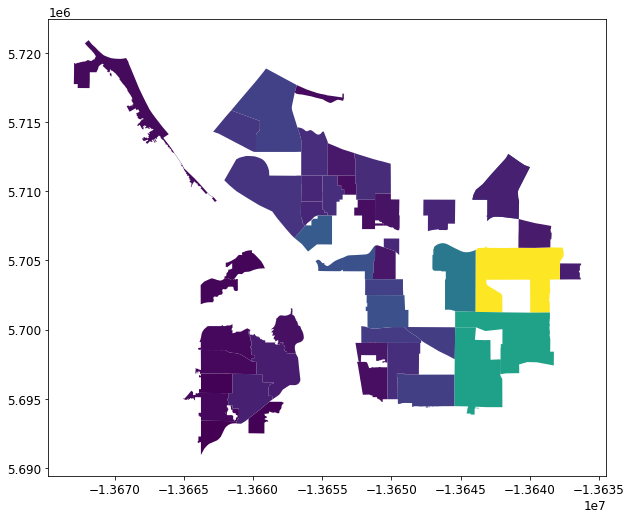

In [197]:
merged.plot(column='OffenseCount')

In [217]:
import folium
basemap = folium.Map(location=[45.523064,-122.676483],
                zoom_start=11,
                tiles='CartoDB positron') #try out the other options!
folium.GeoJson(merged).add_to(basemap)
basemap.save("map.html")
from IPython.display import IFrame

IFrame(src='map.html', width=1280, height=600)

In [90]:
data.head()

,Address,CaseNumber,CrimeAgainst,Neighborhood,OccurDate,OccurTime,OffenseCategory,OffenseType,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,ReportDate,OffenseCount,OccurDay,OccurYear,OccurMonth,OccurMonth_Year
912,NaN,15-X4331944,Person,Brentwood-Darlington,2015-07-01,138,Assault Offenses,Simple Assault,NaN,NaN,NaN,NaN,01/07/2015,1,1,2015,7,2015-07
918,NaN,15-X4332622,Person,Lloyd,2015-07-01,1230,Assault Offenses,Aggravated Assault,NaN,NaN,NaN,NaN,01/07/2015,1,1,2015,7,2015-07
919,NaN,15-X4332748,Person,Humboldt,2015-07-01,1315,Assault Offenses,Intimidation,NaN,NaN,NaN,NaN,01/07/2015,1,1,2015,7,2015-07
920,NaN,15-X4332811,Person,Centennial,2015-07-01,1746,Assault Offenses,Simple Assault,NaN,NaN,NaN,NaN,01/07/2015,2,1,2015,7,2015-07
921,NaN,15-X4332836,Person,Hazelwood,2015-07-01,2134,Assault Offenses,Simple Assault,NaN,NaN,NaN,NaN,01/07/2015,1,1,2015,7,2015-07


In [96]:
data.groupby(['OccurMonth_Year','Neighborhood','OffenseCategory']).OffenseCount.sum().reset_index()

,OccurMonth_Year,Neighborhood,OffenseCategory,OffenseCount
0,2015-07,Alameda,Burglary,3
1,2015-07,Alameda,Fraud Offenses,4
2,2015-07,Alameda,Larceny Offenses,3
3,2015-07,Alameda,Motor Vehicle Theft,3
4,2015-07,Alameda,Vandalism,2
...,...,...,...,...
48085,2021-05,Woodstock,Burglary,6
48086,2021-05,Woodstock,Fraud Offenses,2
48087,2021-05,Woodstock,Larceny Offenses,15
48088,2021-05,Woodstock,Motor Vehicle Theft,6


In [97]:
data['OffenseCategory'].value_counts()

Larceny Offenses                143277
Assault Offenses                 44756
Vandalism                        39433
Motor Vehicle Theft              37608
Burglary                         25971
Fraud Offenses                   23569
Drug/Narcotic Offenses            9082
Robbery                           6012
Counterfeiting/Forgery            4043
Weapon Law Violations             3695
Sex Offenses                      3426
Arson                             1951
Prostitution Offenses              865
Embezzlement                       672
Stolen Property Offenses           540
Kidnapping/Abduction               385
Pornography/Obscene Material       298
Homicide Offenses                  203
Animal Cruelty Offenses            175
Extortion/Blackmail                160
Human Trafficking Offenses         118
Bribery                             13
Gambling Offenses                    1
Name: OffenseCategory, dtype: int64

In [104]:
data.head()
df_long=data.groupby(['OccurMonth_Year','Neighborhood','OffenseCategory']).OffenseCount.sum().reset_index()

df_long=df_long.pivot_table(index=["Neighborhood","OccurMonth_Year"], 
                    columns='OffenseCategory', 
                    values='OffenseCount').reset_index()
df_long=df_long.fillna(0)
df_long['Total_Offenses']=df_long.iloc[:,4:].sum(axis=1)



In [39]:
df_long.head()

OffenseCategory,Neighborhood,OccurMonth_Year,Animal Cruelty Offenses,Arson,Assault Offenses,Bribery,Burglary,Counterfeiting/Forgery,Drug/Narcotic Offenses,Embezzlement,...,Larceny Offenses,Motor Vehicle Theft,Pornography/Obscene Material,Prostitution Offenses,Robbery,Sex Offenses,Stolen Property Offenses,Vandalism,Weapon Law Violations,Total_Offenses
0,Alameda,2015-07,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15.0
1,Alameda,2015-08,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,...,10.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,20.0
2,Alameda,2015-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0
3,Alameda,2015-10,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,8.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,16.0
4,Alameda,2015-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [105]:
df_long['First_Corona_Case']=0
df_long.loc[(df_long['OccurMonth_Year']>="2020-02"),'First_Corona_Case'] =1


In [106]:
df_long[df_long['First_Corona_Case']==1]

OffenseCategory,Neighborhood,OccurMonth_Year,Animal Cruelty Offenses,Arson,Assault Offenses,Bribery,Burglary,Counterfeiting/Forgery,Drug/Narcotic Offenses,Embezzlement,...,Motor Vehicle Theft,Pornography/Obscene Material,Prostitution Offenses,Robbery,Sex Offenses,Stolen Property Offenses,Vandalism,Weapon Law Violations,Total_Offenses,First_Corona_Case
55,Alameda,2020-02,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0,1
56,Alameda,2020-03,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0,1
57,Alameda,2020-04,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,11.0,1
58,Alameda,2020-05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,16.0,1
59,Alameda,2020-06,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6686,Woodstock,2021-01,0.0,1.0,6.0,0.0,6.0,0.0,2.0,0.0,...,5.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,53.0,1
6687,Woodstock,2021-02,0.0,2.0,6.0,0.0,7.0,0.0,0.0,0.0,...,5.0,0.0,0.0,1.0,0.0,0.0,8.0,0.0,45.0,1
6688,Woodstock,2021-03,0.0,1.0,6.0,0.0,3.0,1.0,0.0,0.0,...,4.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,38.0,1
6689,Woodstock,2021-04,0.0,0.0,3.0,0.0,6.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,39.0,1


In [142]:
df_grouped=df_long.groupby(['OccurMonth_Year'])[['First_Corona_Case', 'Total_Offenses']].sum().reset_index()
df_grouped['First_Corona_Case']=0
df_grouped.loc[(df_grouped['OccurMonth_Year']=="2020-02"),'First_Corona_Case'] =1

In [43]:
    df_grouped[df_grouped['First_Corona_Case']==1]

NameError: name 'df_grouped' is not defined

In [42]:
df_grouped.plot(x = "OccurMonth_Year", y = "Total_Offenses")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Date')
ax.set_ylabel('Offenses')


NameError: name 'df_grouped' is not defined

In [107]:
df_long['Neighborhood'] = df_long['Neighborhood'].str.upper()


In [184]:
xl = pd.ExcelFile('data/neighborhood_controls.xlsx')
controls = xl.parse('Sheet1')

controls=controls.replace({'Neighborhood': {'ARDENWALD-JOHNSON CREEK': 'ARDENWALD',
                                            'BRENTWOOD/ DARLINGTON': 'BRENTWOOD-DARLINGTON',
                                            'NORTHWEST DISTRICT': 'NORTHWEST INDUSTRIAL',
                                            'ST. JOHNS': 'ST JOHNS',
                                            'LLOYD DISTRICT': 'LLOYD',
                                            "SULLIVAN’S GULCH": "SULLIVAN'S GULCH" ,
                                            'LLOYD DISTRICT': 'LLOYD',
                                            'OLD TOWN/ CHINATOWN': 'OLD TOWN/CHINATOWN',  
                                            'BUCKMAN' : 'BUCKMAN EAST',
                                           }})





In [185]:
long_data_with_controls_df = pd.merge(
    left=df_long,
    right=controls,
    on='Neighborhood',
    how='left'
)

In [186]:
long_data_with_controls_df=long_data_with_controls_df[long_data_with_controls_df['commute_by_walking_perc'].notnull()]
long_data_with_controls_df['Total_Offenses_org']= long_data_with_controls_df['Total_Offenses']
long_data_with_controls_df['Total_Offenses']= np.log(long_data_with_controls_df['Total_Offenses'])


In [181]:
long_data_with_controls_df.columns

Index(['Neighborhood', 'OccurMonth_Year', 'Animal Cruelty Offenses', 'Arson',
       'Assault Offenses', 'Bribery', 'Burglary', 'Counterfeiting/Forgery',
       'Drug/Narcotic Offenses', 'Embezzlement', 'Extortion/Blackmail',
       'Fraud Offenses', 'Gambling Offenses', 'Homicide Offenses',
       'Human Trafficking Offenses', 'Kidnapping/Abduction',
       'Larceny Offenses', 'Motor Vehicle Theft',
       'Pornography/Obscene Material', 'Prostitution Offenses', 'Robbery',
       'Sex Offenses', 'Stolen Property Offenses', 'Vandalism',
       'Weapon Law Violations', 'Total_Offenses', 'First_Corona_Case',
       'avg_home_price', 'median_home_price', 'average_cost_per_foot',
       'days_on_market', 'homes_sold_2017', 'condo_sales',
       'distressed_property_sales', 'year_built', 'adj_popn',
       'adj_popn_pe_sq_mi', 'median_age', 'median_household_income',
       'home_ownership', 'married', 'divorced', 'widowed', 'seperated',
       'never_married', 'popn_bachelors_degree_perc',

In [187]:
import statsmodels.formula.api as sm
import statsmodels.formula.api as smf



#Y = long_data_with_controls_df['Total_Offenses']

#X = long_data_with_controls_df['First_Corona_Case']
#X = sm.add_constant(X)
#X1 = long_data_with_controls_df['First_Corona_Case','']
#X1 = sm.add_constant(X)


ols_1 = sm.ols(formula='Total_Offenses ~ First_Corona_Case',
                          data=long_data_with_controls_df).fit()
ols_2 =  smf.mixedlm('Total_Offenses ~ First_Corona_Case',long_data_with_controls_df, groups=long_data_with_controls_df["Neighborhood"]).fit()


ols_3 =  smf.mixedlm('Total_Offenses ~ First_Corona_Case  + median_household_income',long_data_with_controls_df, groups=long_data_with_controls_df["Neighborhood"]).fit()


ols_4 =  smf.mixedlm('Total_Offenses ~ First_Corona_Case + median_household_income + people_below_poverty',long_data_with_controls_df, groups=long_data_with_controls_df["Neighborhood"]).fit()


ols_5 =  smf.mixedlm('Total_Offenses ~ First_Corona_Case + median_household_income + unemployed_perc + people_below_poverty',long_data_with_controls_df, groups=long_data_with_controls_df["Neighborhood"]).fit()


ols_6 =  smf.mixedlm('Total_Offenses ~ First_Corona_Case + median_household_income + unemployed_perc + people_below_poverty + perc_diff_state_last_year + total_newcomers_perc',long_data_with_controls_df, groups=long_data_with_controls_df["Neighborhood"]).fit()



ols_7 =  smf.mixedlm('Total_Offenses ~ First_Corona_Case + median_household_income + unemployed_perc + people_below_poverty + perc_diff_state_last_year + total_newcomers_perc',long_data_with_controls_df, groups=long_data_with_controls_df["Neighborhood"]).fit()


ols_8 =  smf.mixedlm('Total_Offenses ~ First_Corona_Case + median_household_income + unemployed_perc + people_below_poverty +  perc_diff_state_last_year + commute_by_walking_perc',long_data_with_controls_df, groups=long_data_with_controls_df["Neighborhood"]).fit()








In [189]:

from statsmodels.iolib.summary2 import summary_col

reg1 = ols_1
reg2 = ols_2
reg3 = ols_3
reg4 = ols_4
reg5 = ols_5
reg6 = ols_6
reg7 = ols_7
reg8 = ols_8


results = summary_col([reg1, reg2, reg3, reg4,reg5,reg6,reg7,reg8],stars=True,float_format='%0.2f',
                  model_names=['Model\n(1)', 'Model\n(2)', 'Model\n(3)',  'Model\n(4)', 
                               'Model\n(5)',  'Model\n(6)',  'Model\n(7)' , 'Model\n(8)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})
results


#-0,05 it would be and approximately 5% decrease in Y

,Model,Model,Model,Model,Model,Model,Model,Model
,(1),(2),(3),(4),(5),(6),(7),(8)
First_Corona_Case,0.02,0.03***,0.03***,0.03***,0.03***,0.03***,0.03***,0.03***
,(0.04),(0.01),(0.01),(0.01),(0.01),(0.01),(0.01),(0.01)
Group Var,,12.02***,6.06***,5.89***,5.94***,5.64***,5.64***,6.07***
,,(1.77),(0.90),(0.88),(0.89),(0.86),(0.86),(0.92)
Intercept,3.29***,3.23***,5.60***,4.55***,4.50***,4.49***,4.49***,4.53***
,(0.02),(0.13),(0.26),(0.61),(0.62),(0.60),(0.60),(0.65)
R-squared,0.00,,,,,,,
R-squared Adj.,-0.00,,,,,,,
commute_by_walking_perc,,,,,,,,0.00


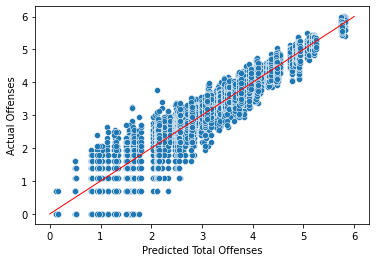

In [208]:



ax = sns.scatterplot(x=ols_8.fittedvalues, y=long_data_with_controls_df['Total_Offenses'])

ax.set_xlabel("Predicted Total Offenses")
ax.set_ylabel("Actual Offenses")

X_ref = Y_ref = np.linspace(0, 6, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

In [201]:
X_ref = Y_ref = 
X_ref

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [80]:

df_long.["First"]

'Aggravated Assault'

In [ ]:
-Convert to plotly and make interactive
-Analyse Seasonality and check whether needs to be detrended
-Analyse impact of 3 stimulus checks (and on which crime?) (to do)
-Remove last 2 months of 2021 due to missing months. (to do)
-Analyse impact of covid. (and on which crime?) (to do)
-Chiroplepthr Map (to do)